# Breast Cancer Analytical Modelling

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams.update({
    "figure.figsize" : (16,8),
    "axes.grid" : True
})

plt.style.use('dark_background')

from sklearn.model_selection import train_test_split
import sklearn.preprocessing as ppUtil
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [13]:
## prepare dataset

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
xDF = pd.DataFrame(dataset.data,columns=dataset.feature_names)
yDF = pd.DataFrame(dataset.target,columns=['target'])

xTrain,xTest,yTrain,yTest = train_test_split(xDF.values,yDF.values,random_state = 42)

## Classification

In [14]:
## Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier()

knnModel = knnClassifier.fit(xTrain,yTrain)

print(f"Training Accuracy : {knnModel.score(xTrain,yTrain)}")
print(f"Testing Accuracy : {knnModel.score(xTest,yTest)}")

Training Accuracy : 0.9342723004694836
Testing Accuracy : 0.965034965034965
&lt;ipython-input-14-4d5221d03aa5&gt;:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnModel = knnClassifier.fit(xTrain,yTrain)


In [15]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

## Fine Tuning to overcome overfitting --> max_depth = 2
dtClassifier = DecisionTreeClassifier(max_depth = 2)

dtModel = dtClassifier.fit(xTrain,yTrain)

print(f"Training Accuracy : {dtModel.score(xTrain,yTrain)}")
print(f"Testing Accuracy : {dtModel.score(xTest,yTest)}")

Training Accuracy : 0.9460093896713615
Testing Accuracy : 0.916083916083916


### Ensemble Methods

Ensemble methods combine predictions of other learning algorithms, to improve the generalization.

Ensemble methods are two types:

- Averaging Methods: They build several base estimators independently and finally average their predictions.
        E.g.: Bagging Methods, Forests of randomised trees
- Boosting Methods: They build base estimators sequentially and try to reduce the bias of the combined estimator.
        E.g.: Adaboost, Gradient Tree Boosting



In [16]:
from sklearn.ensemble import RandomForestClassifier 

rfClassifier = RandomForestClassifier()

rfModel = rfClassifier.fit(xTrain,yTrain)

print(f"Training Accuracy : {rfModel.score(xTrain,yTrain)}")
print(f"Testing Accuracy : {rfModel.score(xTest,yTest)}")

&lt;ipython-input-16-a0c6ba420db7&gt;:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfModel = rfClassifier.fit(xTrain,yTrain)
Training Accuracy : 1.0
Testing Accuracy : 0.972027972027972


### SVM

Support Vector Machines (SVMs) separates data points based on decision planes, which separates objects belonging to different classes in a higher dimensional space.

    SVM algorithm uses the best suitable kernel, which is capable of separating data points into two or more classes.

    Commonly used kernels are:
- linear
- polynomial
- rbf
- sigmoid



In [17]:
from sklearn.svm import SVC

svmClassifier = make_pipeline(ppUtil.StandardScaler(),SVC(gamma="auto",verbose=2))

svmModel = svmClassifier.fit(xTrain,yTrain)


print(f"Training Accuracy : {svmModel.score(xTrain,yTrain)}")
print(f"Testing Accuracy : {svmModel.score(xTest,yTest)}")

[LibSVM]Training Accuracy : 0.9882629107981221
Testing Accuracy : 0.972027972027972
/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [18]:
svmModel[1].support_vectors_

array([[ 0.32780248,  0.75989417,  0.28979245, ...,  0.15456812,
         0.48294107,  0.8185546 ],
       [ 0.27681948,  0.66760365,  0.22141192, ...,  0.62696257,
        -0.3300075 , -0.26286225],
       [ 2.30764239,  0.1114941 ,  2.50927638, ...,  2.77138471,
         1.91373055,  0.82823553],
       ...,
       [-0.27832876,  0.36470143, -0.24324619, ...,  0.08464131,
        -0.51210798, -0.09145284],
       [-1.48266056, -1.07881697, -1.36328643, ..., -1.00683848,
        -1.0145102 ,  1.42674481],
       [-0.70318711, -0.20560666, -0.68854354, ...,  0.14213669,
        -0.11701498,  0.43416472]])

### Classification Report

Need to provide both prediction and test data

In [19]:

yPred = svmModel.predict(xTest)
print(classification_report(yTest, yPred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



## Clustering

Clustering is one of the unsupervised learning technique.

    The technique is typically used to group data points into clusters based on a specific algorithm.

    Major clustering algorithms that can be implemented using scikit-learn are:
- K-means Clustering
- Agglomerative clustering (hierarchical clustering) 
    - Merging of two clusters can be any of the following linkage type: ward, complete or average.
- DBSCAN clustering (density based clustering)
- Mean-shift clustering
    - Identify blob areas with randomly guessed centroids.
    - Calculate the centroid of each blob area and shift to a new one, if there is a difference.
    - Repeat the above step till the centroids converge.

- Affinity propagation
    - preference: It controls the number of exemplars to be chosen by the algorithm.
    - damping: It controls numerical oscillations while updating messages.

- Spectral clustering
    - Build an affinity matrix of data points.
    - Embed data points in a lower dimensional space.
    - Use a clustering method like k-means to partition the points on lower dimensional space.

### Evaluation 

A clustering algorithm is majorly evaluated using the following scores:

    Homogeneity: Evaluates if each cluster contains only members of a single class.

    Completeness: All members of a given class are assigned to the same cluster.

    V-measure: Harmonic mean of Homogeneity and Completeness.

    Adjusted Rand index: Measures similarity of two assignments.




&lt;ipython-input-66-4d0c7411996a&gt;:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


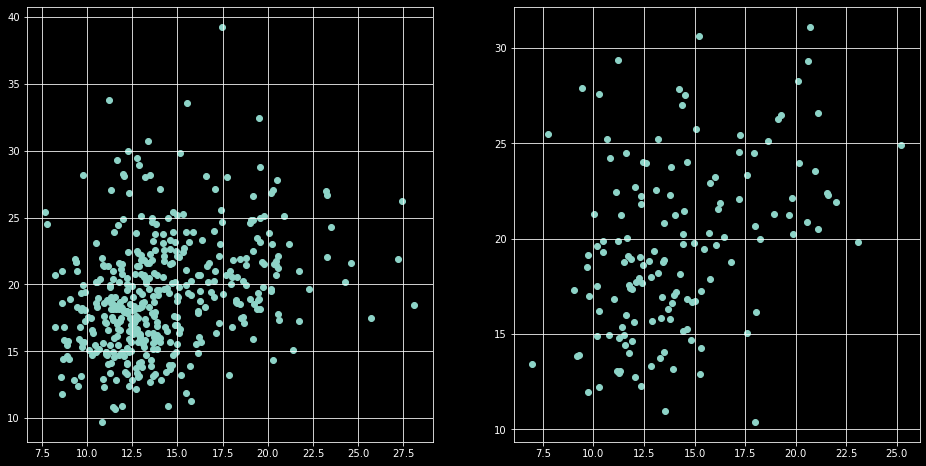

In [66]:
trainDataTocluster = xTrain[:,0:2]
testDataToCluster = xTest[:,0:2]

fig,ax = plt.subplots(1,2)
ax[0].scatter(trainDataTocluster[:,0],trainDataTocluster[:,1])
ax[1].scatter(testDataToCluster[:,0],testDataToCluster[:,1])
fig.show()

&lt;ipython-input-72-3e501c397c4c&gt;:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


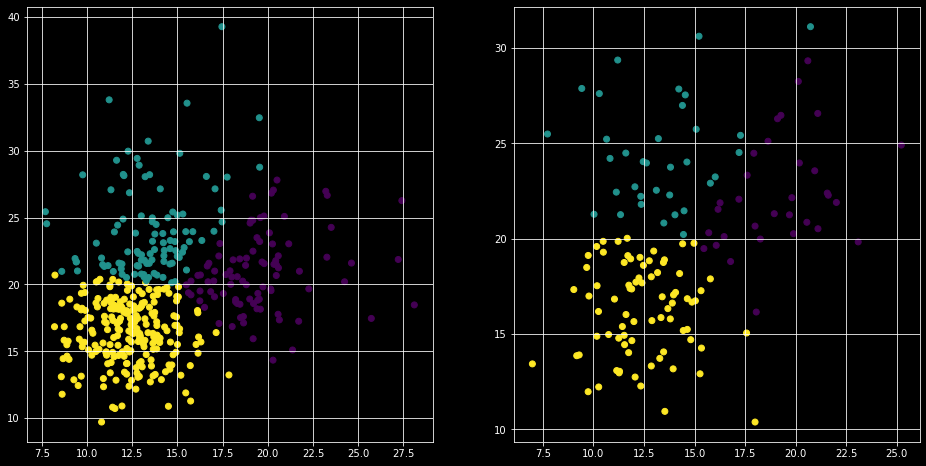

In [72]:
from sklearn.cluster import KMeans


kMeansCluster = KMeans(n_clusters=3)
kMeansModel = kMeansCluster.fit(trainDataTocluster)

trainEstimation = kMeansModel.predict(trainDataTocluster)
testEstimation = kMeansModel.predict(testDataToCluster)

fig,ax = plt.subplots(1,2)
ax[0].scatter(trainDataTocluster[:,0],trainDataTocluster[:,1],c= trainEstimation)
ax[1].scatter(testDataToCluster[:,0],testDataToCluster[:,1], c= testEstimation)
fig.show()

&lt;ipython-input-76-ebbdba8f5bb2&gt;:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


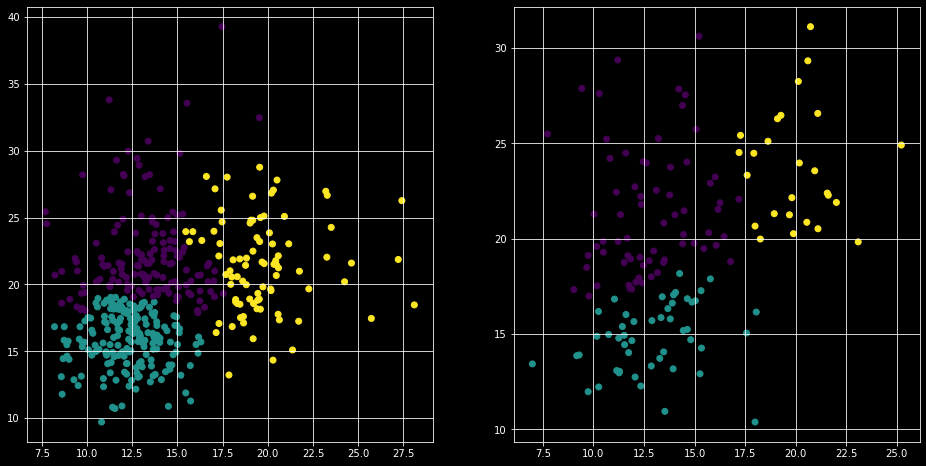

In [76]:
from sklearn.cluster import AgglomerativeClustering

agClustering = AgglomerativeClustering(n_clusters=3)
agModel = agClustering.fit(trainDataTocluster)

trainEstimation = agModel.fit_predict(trainDataTocluster)
testEstimation = agModel.fit_predict(testDataToCluster)

fig,ax = plt.subplots(1,2)
ax[0].scatter(trainDataTocluster[:,0],trainDataTocluster[:,1],c= trainEstimation)
ax[1].scatter(testDataToCluster[:,0],testDataToCluster[:,1], c= testEstimation)
fig.show()

&lt;ipython-input-91-e930de93d5f0&gt;:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


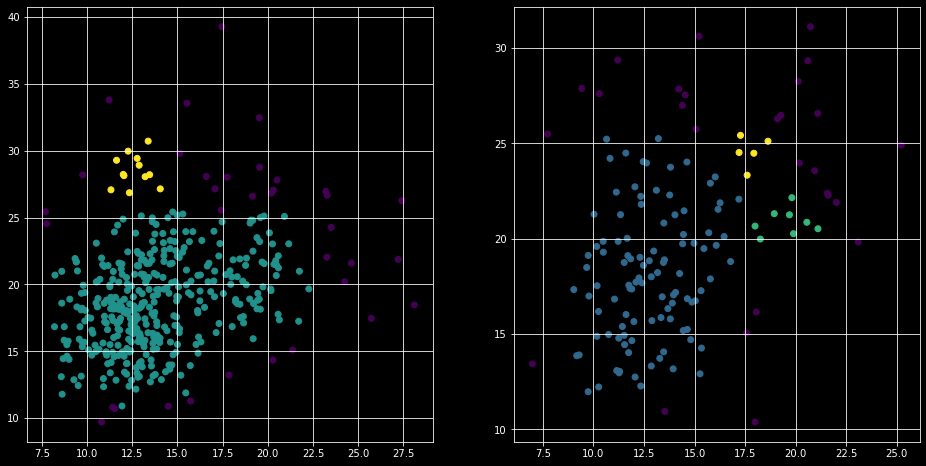

In [91]:
from sklearn.cluster import DBSCAN

dbscanClustering = DBSCAN(eps= 1.5 ,min_samples=5)
dbscanModel = dbscanClustering.fit(trainDataTocluster)

trainEstimation = dbscanModel.fit_predict(trainDataTocluster)
testEstimation = dbscanModel.fit_predict(testDataToCluster)

fig,ax = plt.subplots(1,2)
ax[0].scatter(trainDataTocluster[:,0],trainDataTocluster[:,1],c= trainEstimation)
ax[1].scatter(testDataToCluster[:,0],testDataToCluster[:,1], c= testEstimation)
fig.show()

In [23]:
# from sklearn.cluster import MeanShift
# from sklearn.cluster import AffinityPropagation
# from sklearn.cluster import spectral_clustering